In [6]:
auto_mpg = read.csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', head = F, sep="")

In [30]:
colnames(auto_mpg) <- c('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name')
head(auto_mpg, 10)

mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500
14,8,454,220.0,4354,9.0,70,1,chevrolet impala
14,8,440,215.0,4312,8.5,70,1,plymouth fury iii
14,8,455,225.0,4425,10.0,70,1,pontiac catalina
15,8,390,190.0,3850,8.5,70,1,amc ambassador dpl


In [8]:
dim(auto_mpg)

[1] 398   9

In [9]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150.0  : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90.00  : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88.00  : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110.0  : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100.0  : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75.00  : 14   Max.   :5140  
                                                 (Other):288                 
  acceleration     model year        origin                car name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:17.18   3rd Qu.:7

In [10]:
object.size(auto_mpg)

50624 bytes

In [11]:
unlist(lapply(auto_mpg, class))

mpg    cylinders displacement   horsepower       weight acceleration 
   "numeric"    "integer"    "numeric"     "factor"    "numeric"    "numeric" 
  model year       origin     car name 
   "integer"    "integer"     "factor"

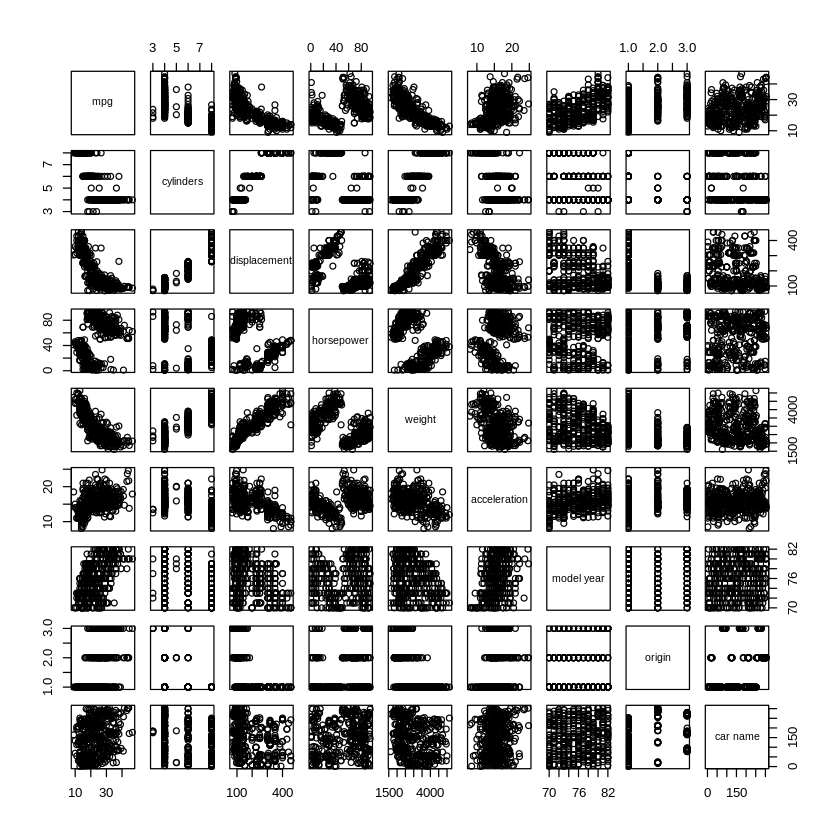

In [12]:
pairs(auto_mpg)

In [13]:
library(ggplot2)

In [14]:
fit1 <- lm(acceleration ~ displacement, data=auto_mpg)
summary(fit1)


Call:
lm(formula = acceleration ~ displacement, data = auto_mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4605 -1.6357 -0.2657  1.3859  8.4781 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.349390   0.245040   74.88   <2e-16 ***
displacement -0.014379   0.001115  -12.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.317 on 396 degrees of freedom
Multiple R-squared:  0.2956,	Adjusted R-squared:  0.2938 
F-statistic: 166.2 on 1 and 396 DF,  p-value: < 2.2e-16


In [15]:
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}

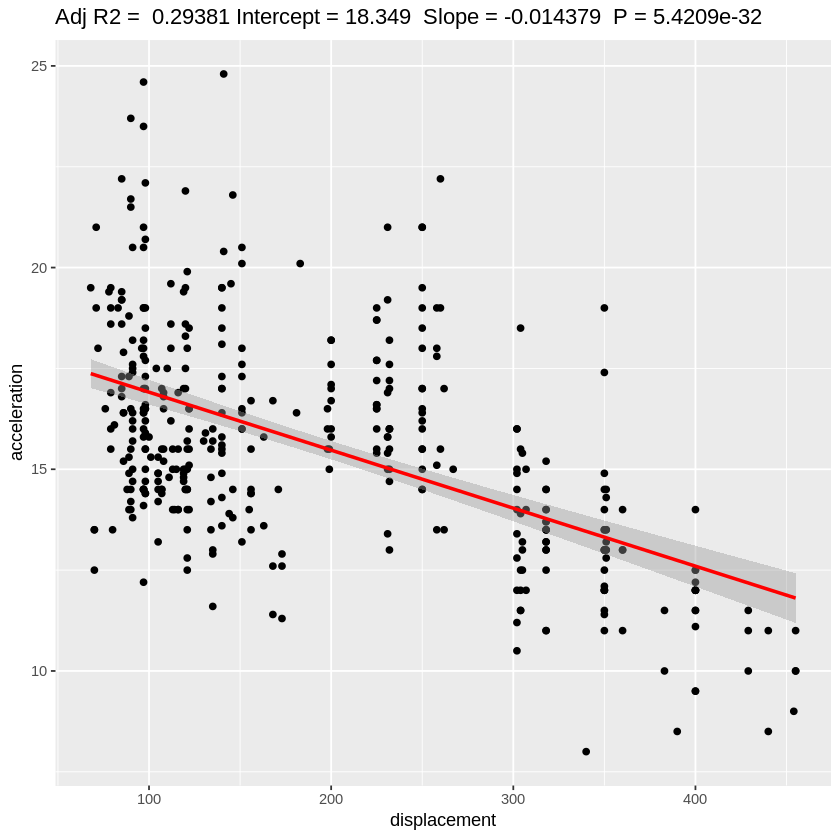

In [16]:
ggplotRegression(fit1)

In [17]:
fit2 <- lm(acceleration ~ weight, data=auto_mpg)
summary(fit1)


Call:
lm(formula = acceleration ~ displacement, data = auto_mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4605 -1.6357 -0.2657  1.3859  8.4781 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.349390   0.245040   74.88   <2e-16 ***
displacement -0.014379   0.001115  -12.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.317 on 396 degrees of freedom
Multiple R-squared:  0.2956,	Adjusted R-squared:  0.2938 
F-statistic: 166.2 on 1 and 396 DF,  p-value: < 2.2e-16


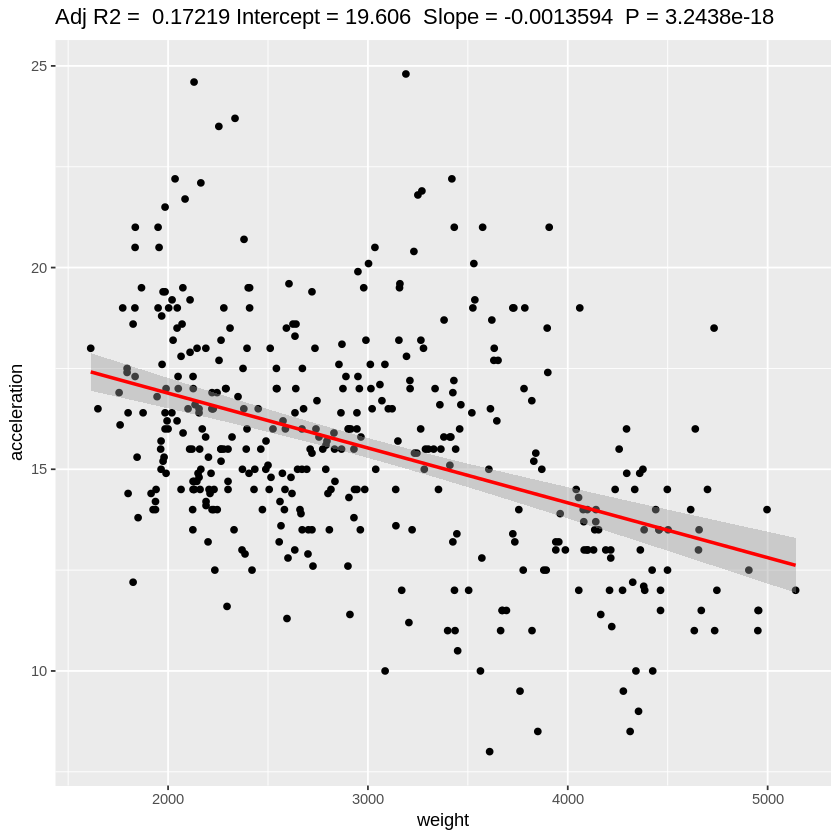

In [18]:
ggplotRegression(fit2)

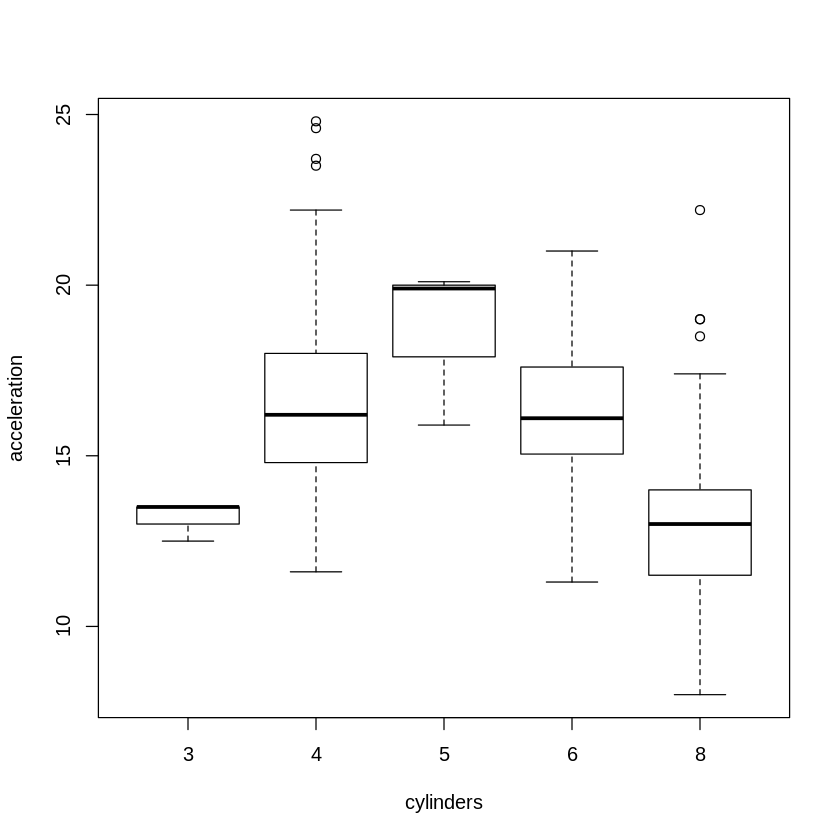

In [19]:
boxplot(acceleration ~ cylinders, data = auto_mpg, xlab = "cylinders", ylab = "acceleration")


Call:
lm(formula = acceleration ~ cylinders, data = auto_mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4826 -1.7601 -0.2601  1.4078  8.7174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0377     0.4016   49.89   <2e-16 ***
cylinders    -0.8194     0.0703  -11.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.383 on 396 degrees of freedom
Multiple R-squared:  0.2554,	Adjusted R-squared:  0.2536 
F-statistic: 135.9 on 1 and 396 DF,  p-value: < 2.2e-16


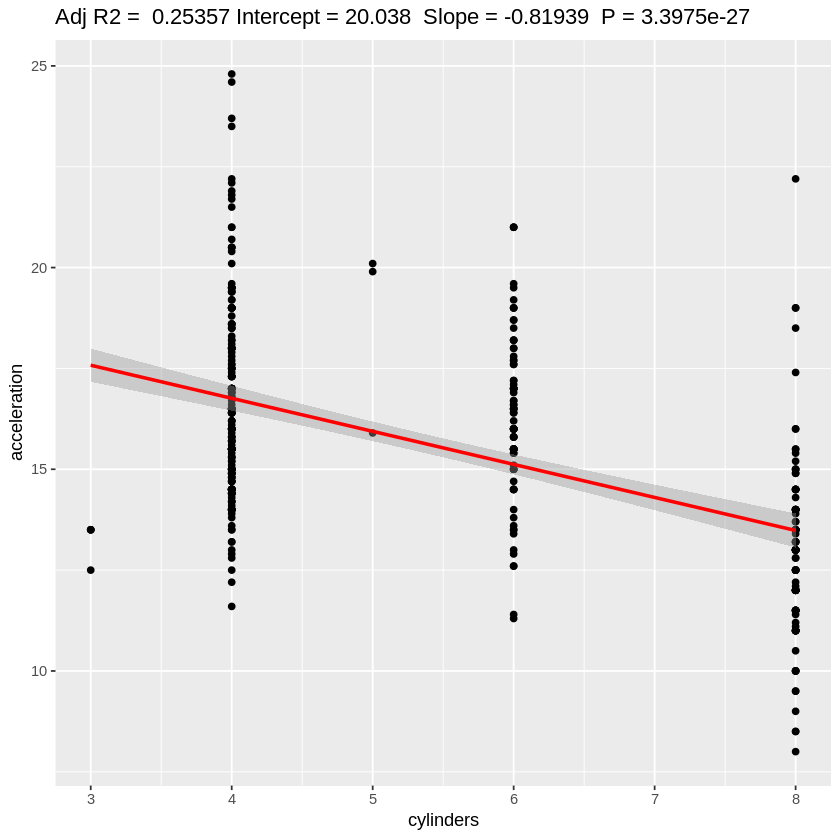

In [20]:
fit3 <- lm(acceleration ~ cylinders, data=auto_mpg)
ggplotRegression(fit3)
summary(fit3)

In [21]:
#There are not many car that were produced with odd number of cylinders, it is better to look at the just the cars with 4,6 and 8 cylinders.

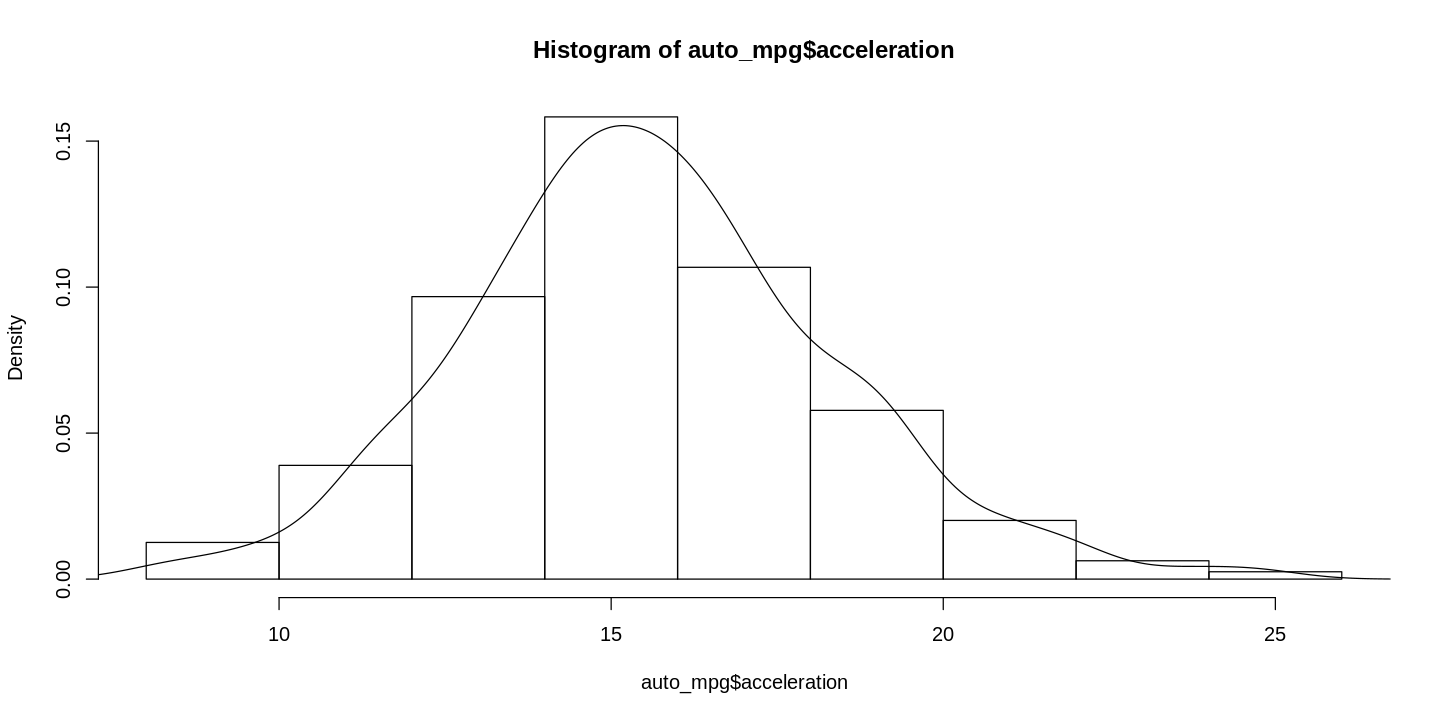

In [41]:
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
hist(auto_mpg$acceleration, freq = F)
lines(density(auto_mpg$acceleration))

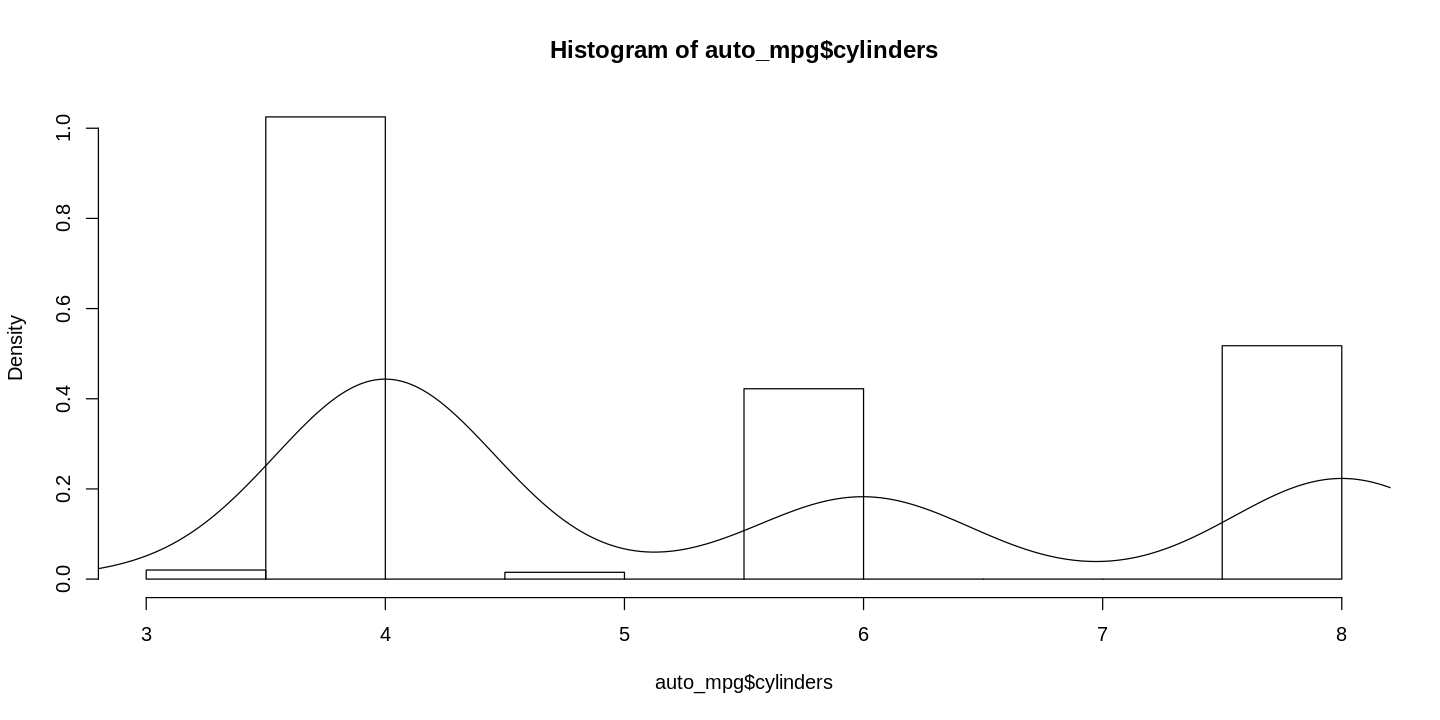

In [42]:
hist(auto_mpg$cylinders, freq = F)
lines(density(auto_mpg$cylinders))

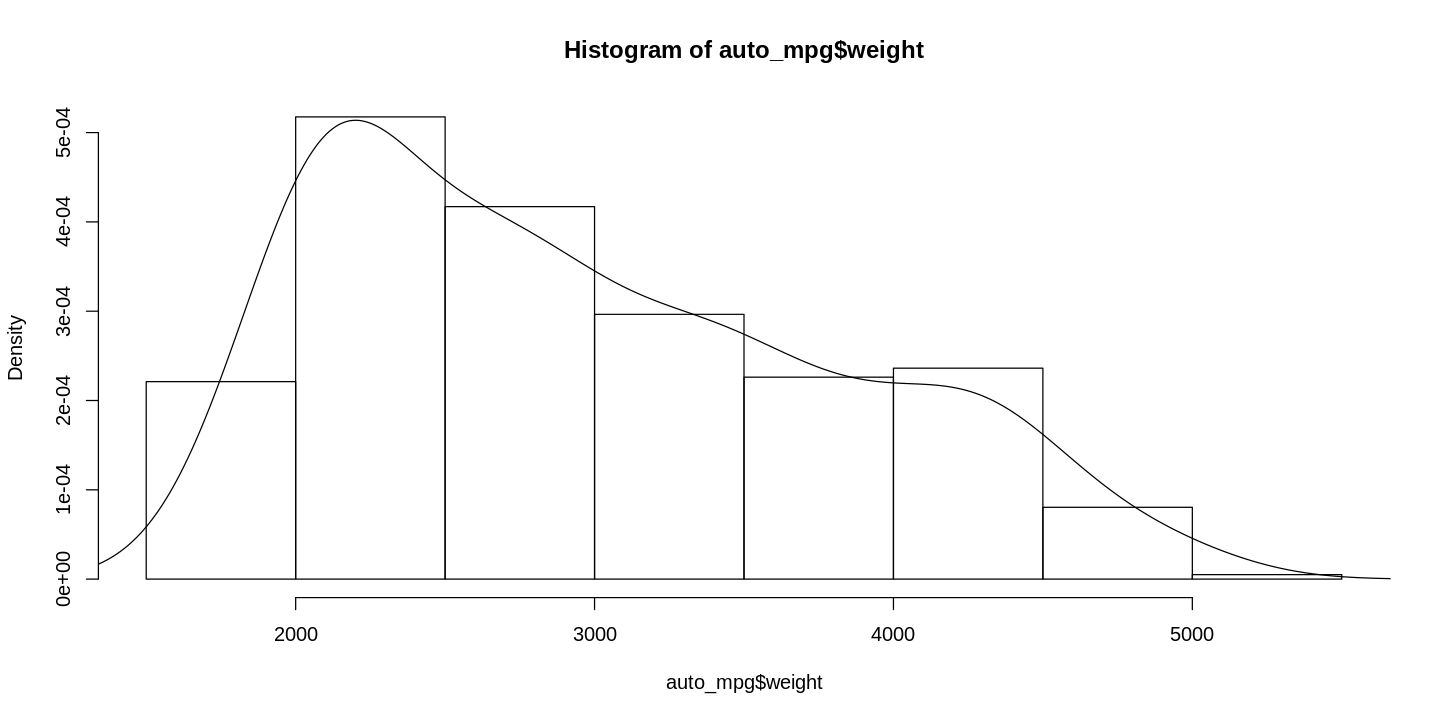

In [43]:
hist(auto_mpg$weight, freq = F)
lines(density(auto_mpg$weight))

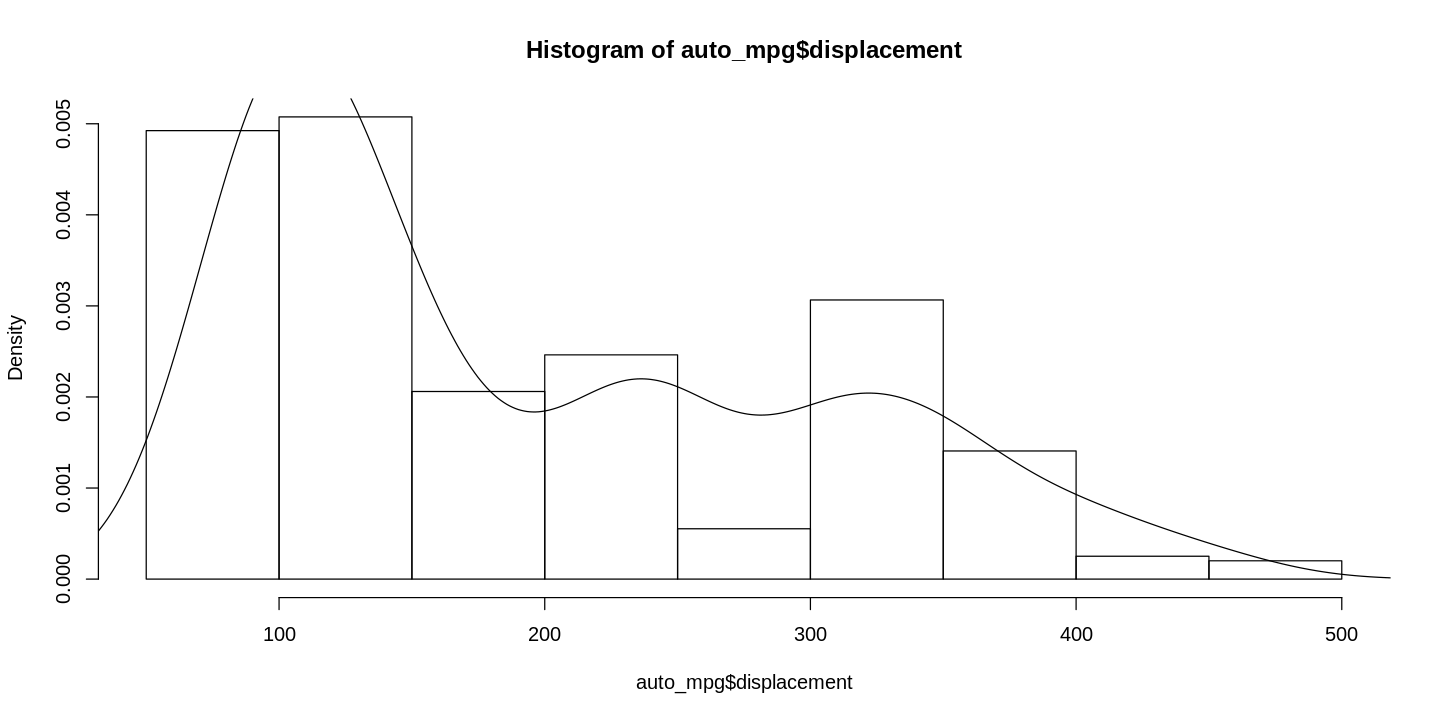

In [44]:
hist(auto_mpg$displacement, freq = F)
lines(density(auto_mpg$displacement))